In [10]:
import pandas as pd
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Сравнение Дерева и Случайного Леса

In [5]:
#@title Код генерации датасета с занятия
def devil(N, D=2, K=3):
    N = 100
    D = 2
    K = 3
    X = np.zeros((N * K, D))
    y = np.zeros(N * K, dtype='uint8')

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    

    X[:, 0] += np.random.normal(loc=0, scale=0.15, size=300)
    X[:, 1] += np.random.normal(loc=0, scale=0.15, size=300)
    return X, y

In [6]:
X, y = devil(100)

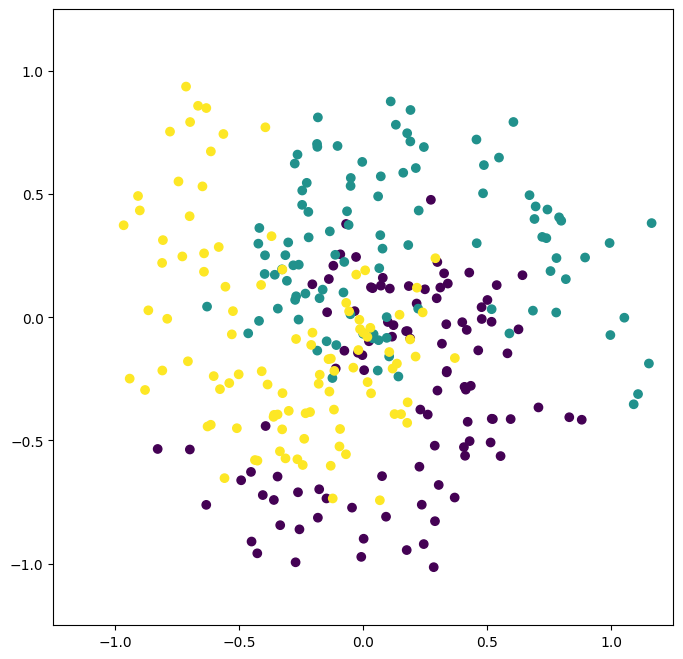

In [20]:
plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25])

plt.show()

In [8]:
models = [DecisionTreeClassifier(max_depth=10),
          RandomForestClassifier(max_depth=10)]

<ipython-input-11-fa12d767ccc0>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


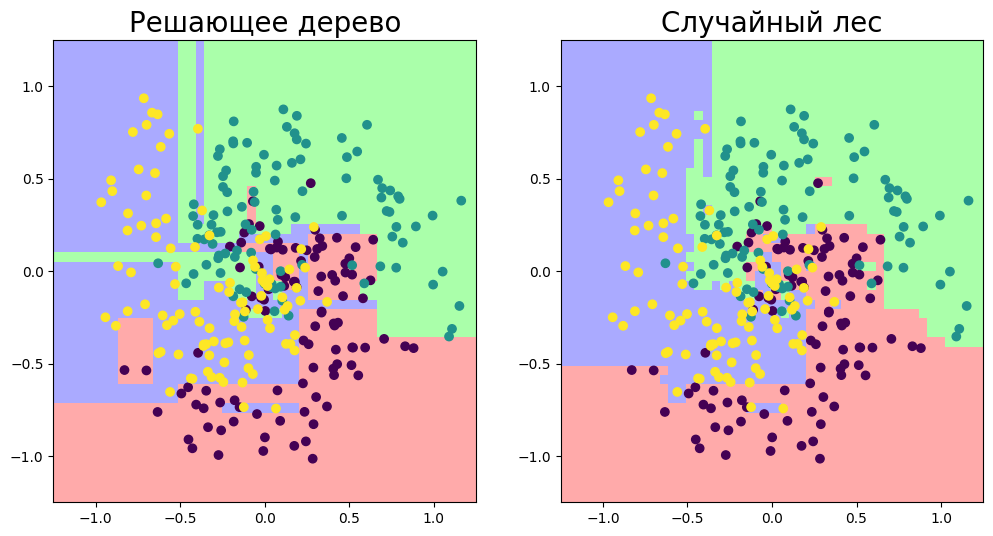

In [11]:
plt.figure(figsize=(12, 6))
plt.title('Max depth = 7')

name = {0: 'Решающее дерево', 1: 'Случайный лес'}
for i, model in enumerate(models):
    model.fit(X, y)

    plt.subplot(1, 2, i+1)
    plt.xlim((-1.25, 1.25))
    plt.ylim((-1.25, 1.25))
    xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 50),
                         np.linspace(-1.25, 1.25, 50))
    plt.gca().set_title(name[i], fontsize=20)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

##Загрузка и исследования данных 
Датасет https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download&select=train.csv

In [17]:
import pandas as pd


train = pd.read_csv('./sample_data/train.csv')
test = pd.read_csv('./sample_data/test.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
df = train

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

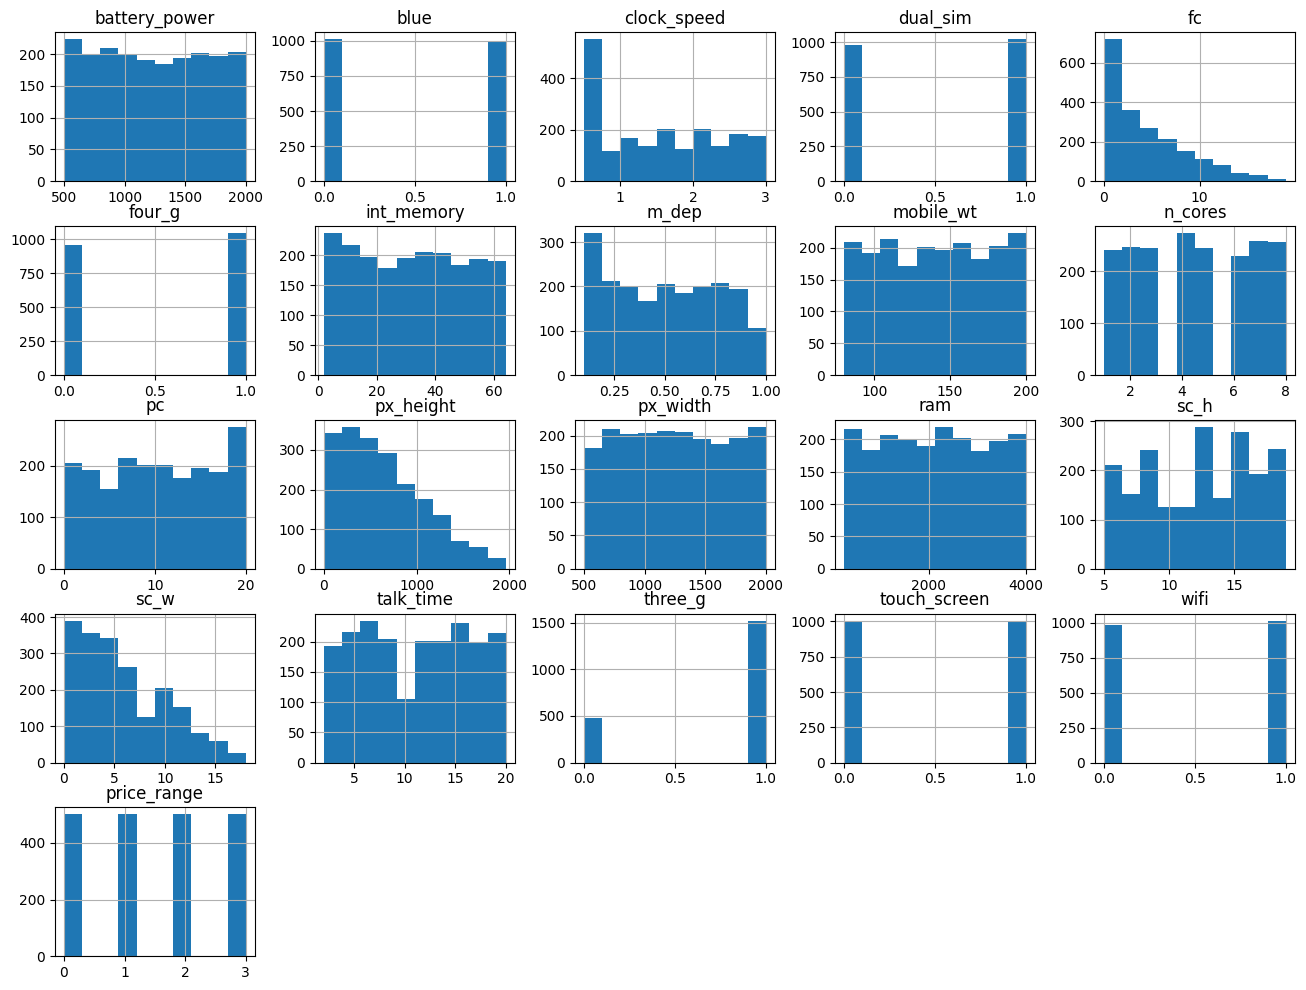

In [21]:
df.hist(figsize=(16, 12))

<Axes: xlabel='price_range', ylabel='battery_power'>

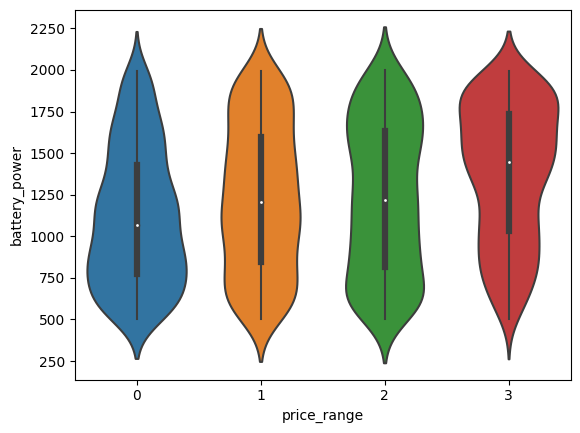

In [22]:
import seaborn as sns

sns.violinplot(x='price_range', y='battery_power', data=df)

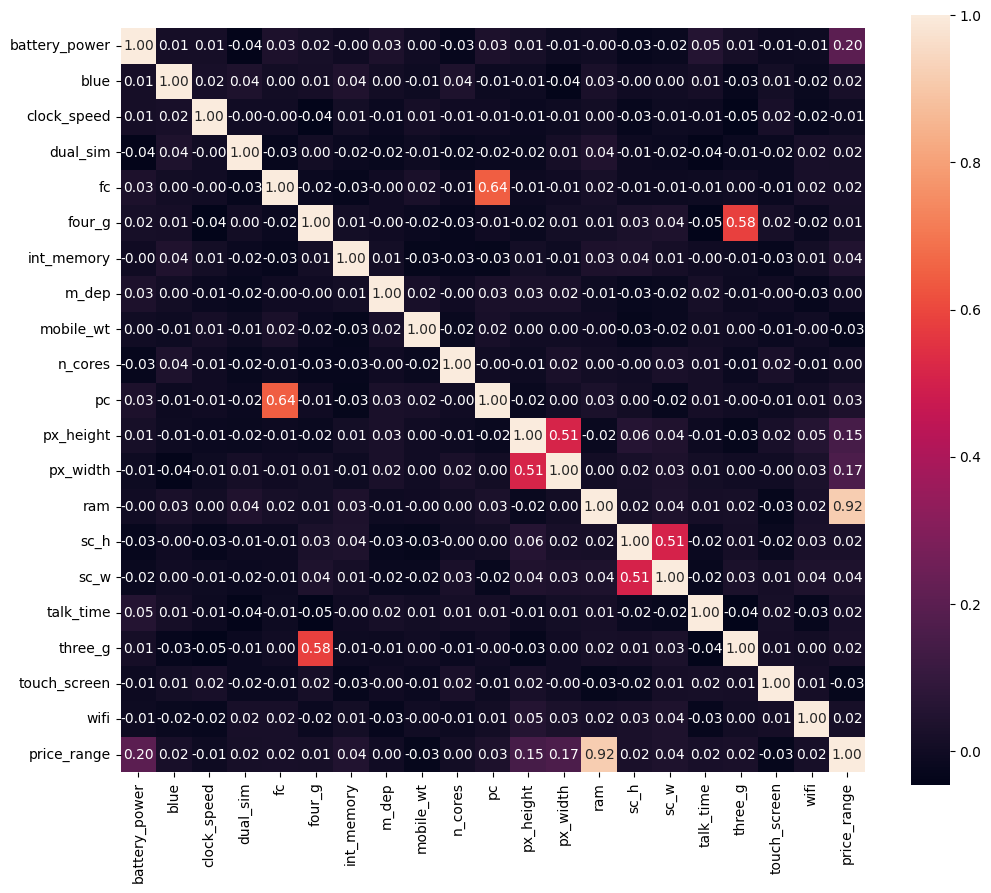

In [23]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), fmt='.2f', square=True, annot=True)
plt.show()

In [24]:
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price_range']), df['price_range'], test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
from sklearn.metrics import classification_report

preds = rf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        91
           1       0.86      0.84      0.85       102
           2       0.76      0.81      0.78        89
           3       0.95      0.90      0.92       118

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [26]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [27]:
preds = rf.predict(X_test) 
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.88      0.86      0.87       102
           2       0.78      0.82      0.80        89
           3       0.94      0.92      0.93       118

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [28]:
X_test.iloc[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
817,918,0,0.9,1,1,0,8,0.1,123,7,5,653,671,1652,17,4,14,1,1,0
497,1337,0,0.5,0,13,0,31,0.8,186,2,20,48,644,2180,7,4,16,1,0,1
569,1366,1,0.7,1,0,1,34,0.1,150,2,9,402,964,3501,13,11,3,1,0,0
1880,1720,0,1.6,0,18,1,2,0.8,188,5,20,334,896,2522,10,5,2,1,0,1
488,1949,0,1.8,0,0,0,20,0.8,186,5,4,518,592,1125,17,10,9,0,0,0


In [29]:
print(f'Предсказания: \n{rf.predict(X_test.iloc[0:5,].values)}')
print(f'Реальный ответ: \n{y_test[:5].values}')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Предсказания: 
[1 1 3 2 1]
Реальный ответ: 
[1 1 3 2 1]


##Сравнение с другими алгоритмами

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
preds = tree.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        91
           1       0.81      0.83      0.82       102
           2       0.75      0.82      0.78        89
           3       0.92      0.90      0.91       118

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.86       400



In [38]:
preds = lr.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        91
           1       0.63      0.42      0.51       102
           2       0.42      0.55      0.48        89
           3       0.75      0.73      0.74       118

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.64       400
weighted avg       0.66      0.65      0.64       400

